### Table of contents
[Predefined functions](#funcs)

[Parameters, filenames and directories](#params)

[Reading maps and catalogs](#read)

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from func_stat import *
from func_visualizations import *
from os.path import join
from ast import literal_eval

### Parameters, filenames and directories
<a id='params'>#params</a>

In [2]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex018'
dirMaps=join(dirSOM,nameOfExperiment,'maps')
dirPlots=join(dirSOM,nameOfExperiment,'plots')
dirDatasets=join(dirSOM,nameOfExperiment,'datasets')

In [66]:
datasetNames={'Train':r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv',
              'Test':r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv',
              'Deimos':r'04_COSMOS_DEIMOS_QfFilter_SOMinfo.csv',
              'Run':r'04_COSMOS2015_run_WorkBands_SOMinfo.csv',
              'Train-qErrClusters':r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo_quantErrClusters.csv'}

In [67]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'
mags=['Ksmagap3','Ymagap3','Hmagap3','Jmagap3','Bmagap3','Vmagap3','ipmagap3','rmagap3','umagap3','zppmagap3']

In [68]:
### Format for saving images ###
imSaveFormat='.png'
#imSaveFormat='.eps'

### Reading datasets
<a id='read'>#read</a>

In [74]:
datasets={}
cellIDs=['cellID_TrainSOM','cellID_RunSOM','cellID_RunBigSOM']
for key,val in datasetNames.items():
    datasets[key]=pd.read_csv(join(dirDatasets,val))
    for cellID in cellIDs:
        datasets[key][cellID]=[literal_eval(x) for x in datasets[key][cellID]]

### Quantization error
<a id='qErr'>#qErr</a>

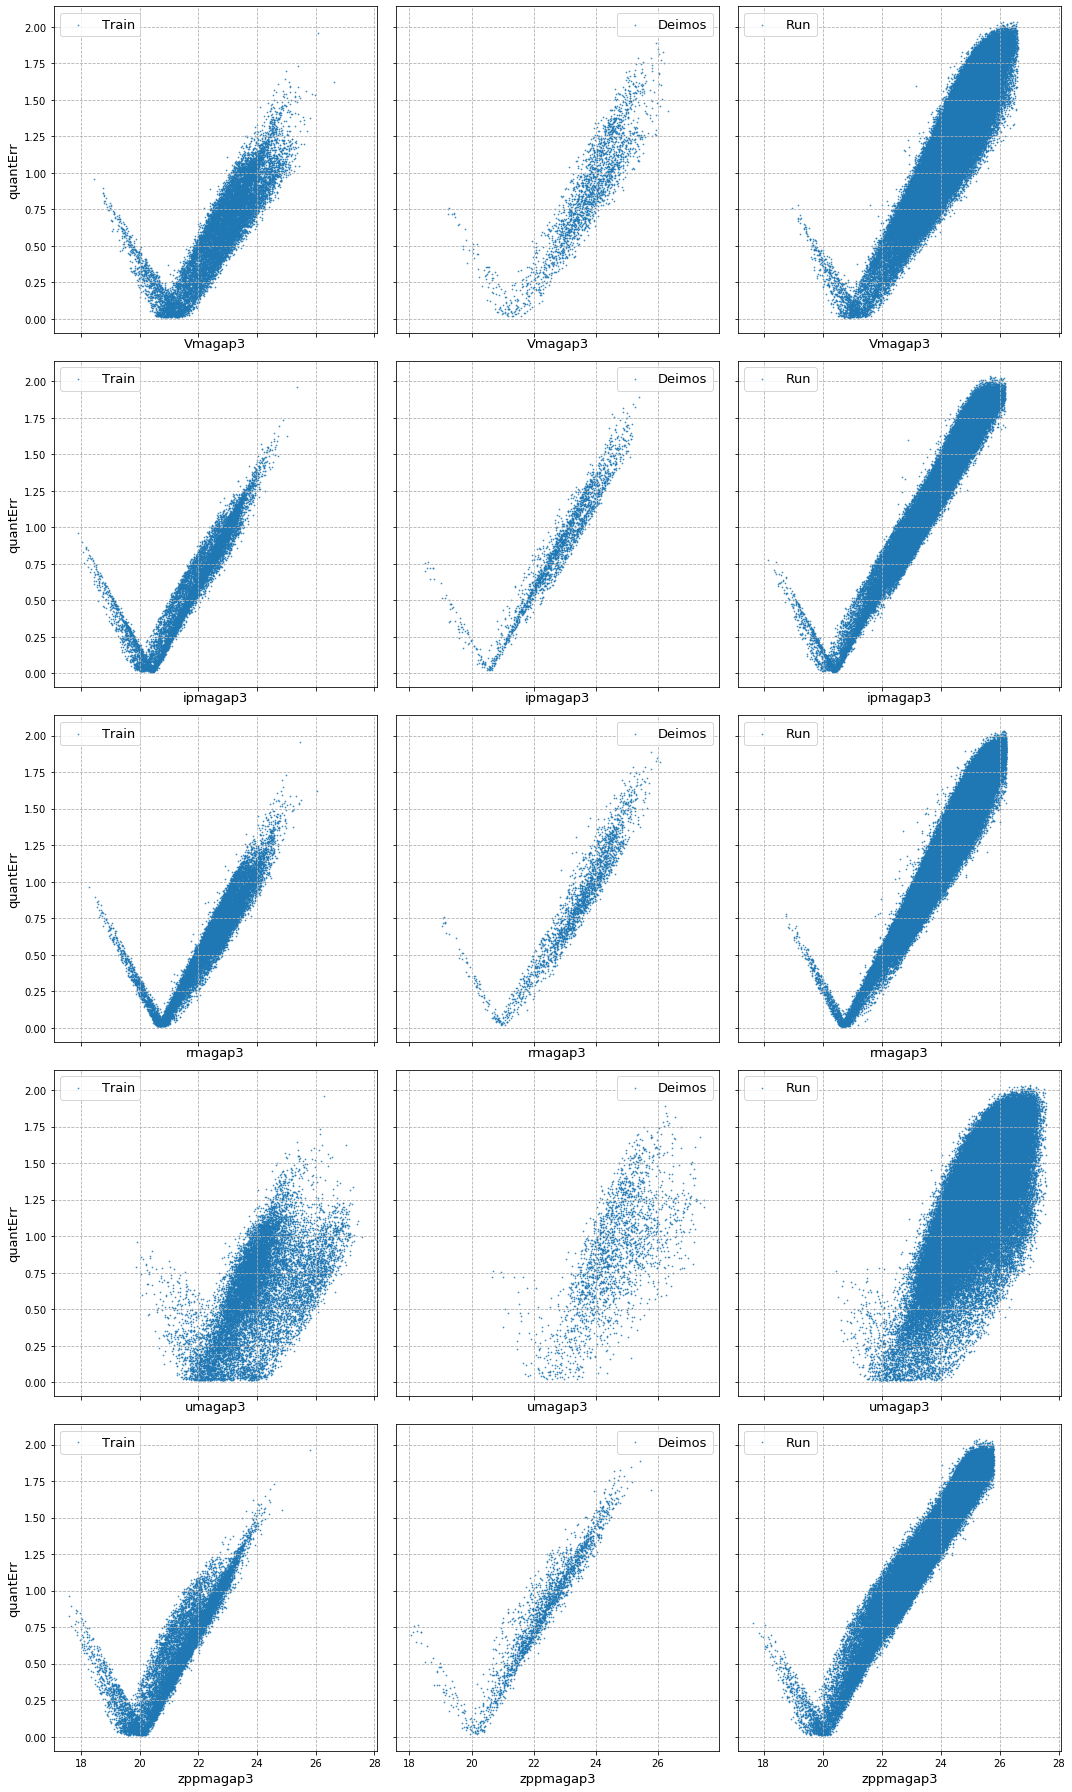

In [32]:
names=['Train','Deimos','Run']
textSize=13
magsWork=mags[5:]
fig,axs=plt.subplots(len(magsWork),3,figsize=(15,5*len(magsWork)),sharey='row',sharex='col')
for i,mag in enumerate(magsWork):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset['quantErr'],s=0.5,label=name,alpha=0.8)
        axs[i][j].legend()
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
    axs[i][0].set_ylabel('quantErr',size=textSize)
plt.tight_layout()

RAJ2000   DEJ2000     Seq  Ksmagap3  Ymagap3  Hmagap3  Jmagap3  Bmagap3  \
0  149.932956  1.618003  224125   18.5047  19.3790  18.7661  19.0600  22.9155   
1  149.941260  1.631180  231138   20.4185  21.5832  20.8081  21.1651  25.0831   
2  149.602128  1.620421  225033   20.6382  21.5354  20.9435  21.4006  24.4224   
3  149.606005  1.625458  227775   21.7412  22.0036  21.8012  21.8242  23.6891   
4  149.576949  1.617860  223338   19.4424  20.3651  19.7565  20.1170  23.1299   

   Vmagap3  ipmagap3  ...  zpp-right_upper  zpp-right_lower  Ks_left  \
0  21.3823   20.0181  ...            False            False    False   
1  23.8862   22.2813  ...             True            False    False   
2  23.4758   22.2950  ...            False             True    False   
3  22.8789   22.2634  ...            False             True    False   
4  22.2686   20.9998  ...            False             True    False   

   Ks-central  Ks-right_upper  Ks-right_lower B-left  B-central  \
0        True           False           False  False       True   
1       False            True           False  False      False   
2       False            True           False  False      False   
3       False           False            True  False      False   
4        True           False           False  False      False   

   B-right_upper  B-right_lower  
0          False          False  
1          False           True  
2          False           True  
3           True          False  
4          False           True  

[5 rows x 67 columns]

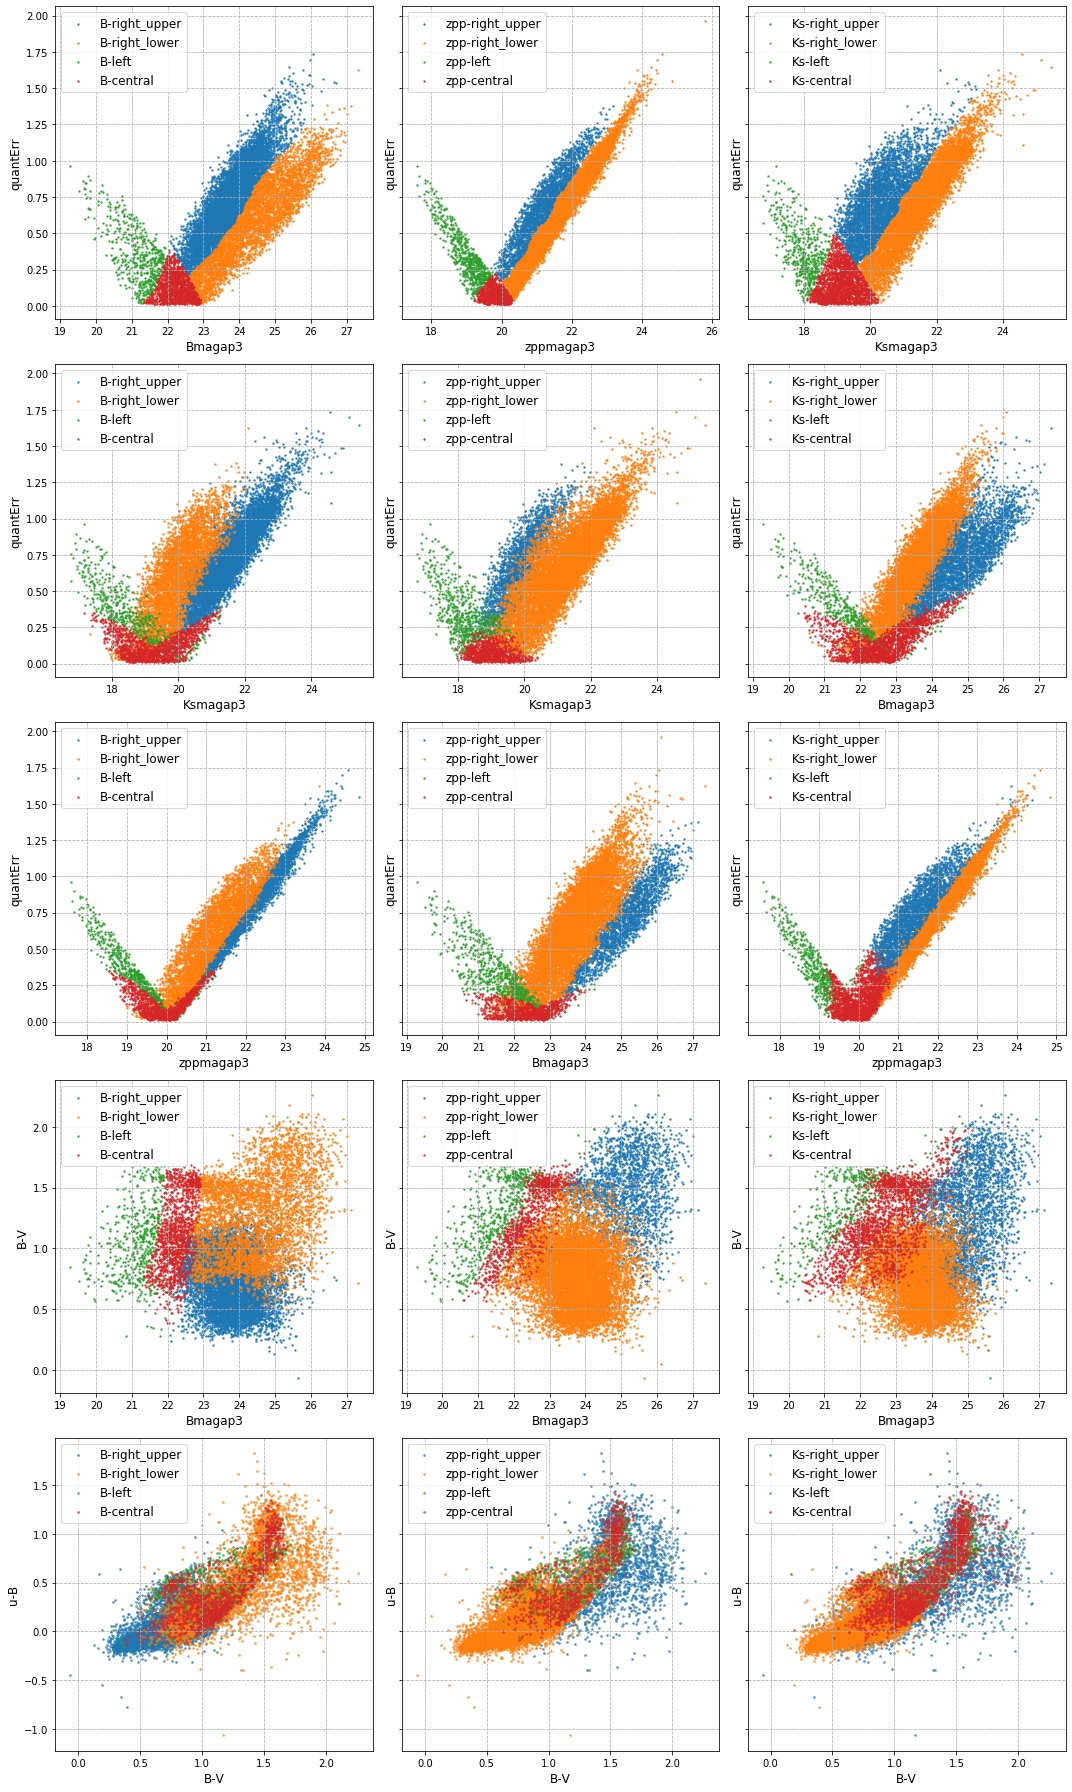

In [78]:
textSize=12
dataset=datasets['Train-qErrClusters']
magClusters=['B','zpp','Ks']
clusterPrefix=['-right_upper','-right_lower','-left','-central']
fig,axs=plt.subplots(5,3,figsize=(15,25),sharey='row')
for j,mag in enumerate(magClusters):
    i=0
    axs[i][j].grid(axis='y',linestyle ='--')
    axs[i][j].grid(axis='x',linestyle ='--')
    for fl in clusterPrefix:
        data=dataset[dataset[mag+fl]==True]
        axs[i][j].scatter(data[mag+'magap3'],data['quantErr'],s=2,label=mag+fl,alpha=0.8)
    lgnd=axs[i][j].legend()
    axs[i][j].set_xlabel(mag+'magap3',size=textSize)
    axs[i][j].legend(prop={'size': textSize})
    axs[i][j].set_ylabel('quantErr',size=textSize)
    
    
    i+=1
    axs[i][j].grid(axis='y',linestyle ='--')
    axs[i][j].grid(axis='x',linestyle ='--')
    for fl in clusterPrefix:
        data=dataset[dataset[mag+fl]==True]
        magOpposite=list(set(magClusters)-set([mag]))[0]
        axs[i][j].scatter(data[magOpposite+'magap3'],data['quantErr'],s=2,label=mag+fl,alpha=0.8)
    lgnd=axs[i][j].legend()
    axs[i][j].set_xlabel(magOpposite+'magap3',size=textSize)
    axs[i][j].legend(prop={'size': textSize})
    axs[i][j].set_ylabel('quantErr',size=textSize)
    
    i+=1
    axs[i][j].grid(axis='y',linestyle ='--')
    axs[i][j].grid(axis='x',linestyle ='--')
    for fl in clusterPrefix:
        data=dataset[dataset[mag+fl]==True]
        magOpposite=list(set(magClusters)-set([mag]))[1]
        axs[i][j].scatter(data[magOpposite+'magap3'],data['quantErr'],s=2,label=mag+fl,alpha=0.8)
    lgnd=axs[i][j].legend()
    axs[i][j].set_xlabel(magOpposite+'magap3',size=textSize)
    axs[i][j].legend(prop={'size': textSize})
    axs[i][j].set_ylabel('quantErr',size=textSize)
    
    i+=1
    axs[i][j].grid(axis='y',linestyle ='--')
    axs[i][j].grid(axis='x',linestyle ='--')
    for fl in clusterPrefix:
        data=dataset[dataset[mag+fl]==True]
        axs[i][j].scatter(data['Bmagap3'],data['B-V'],s=2,label=mag+fl,alpha=0.8)
    lgnd=axs[i][j].legend()
    axs[i][j].set_xlabel('Bmagap3',size=textSize)
    axs[i][j].legend(prop={'size': textSize})
    axs[i][j].set_ylabel('B-V',size=textSize)
    
    i+=1
    axs[i][j].grid(axis='y',linestyle ='--')
    axs[i][j].grid(axis='x',linestyle ='--')
    for fl in clusterPrefix:
        data=dataset[dataset[mag+fl]==True]
        axs[i][j].scatter(data['B-V'],data['u-B'],s=3,label=mag+fl,alpha=0.6)
    lgnd=axs[i][j].legend()
    axs[i][j].set_ylabel('u-B',size=textSize)
    axs[i][j].legend(prop={'size': textSize})
    axs[i][j].set_xlabel('B-V',size=textSize)

plt.tight_layout()

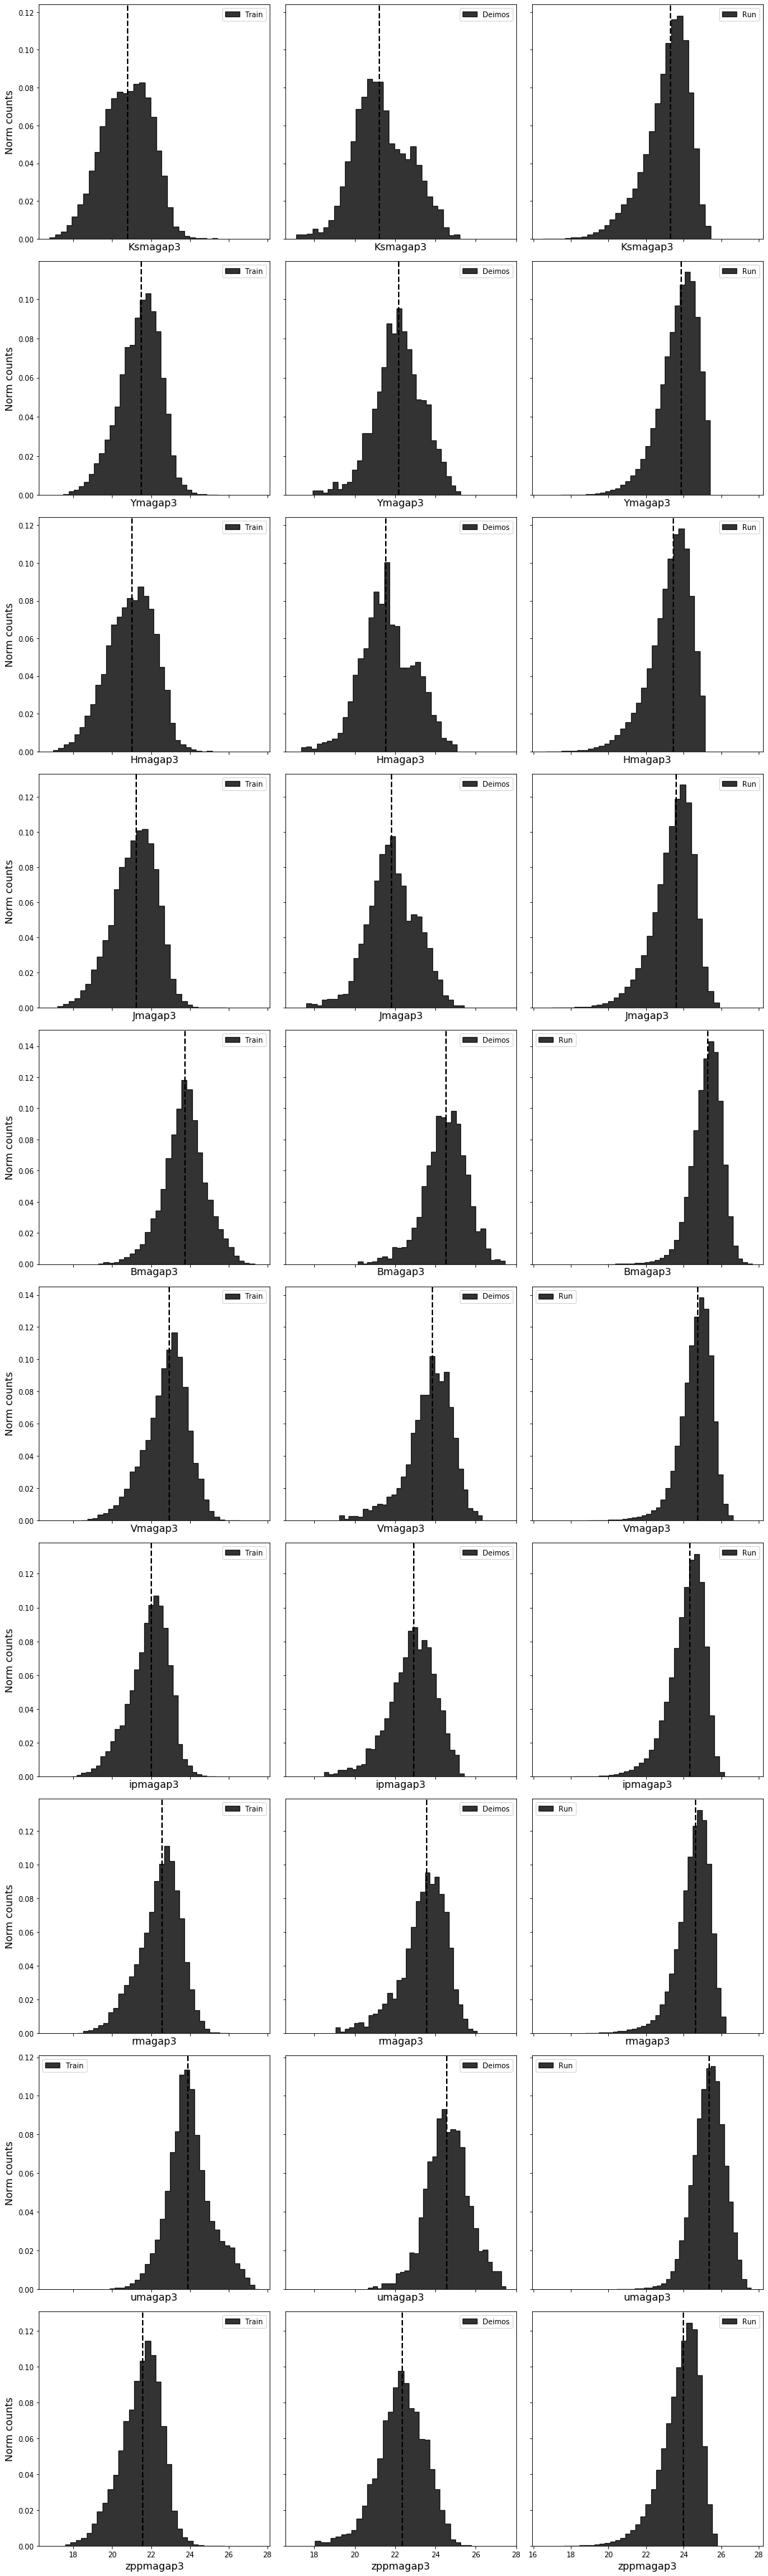

In [35]:
names=['Train','Deimos','Run']
bins=30
alpha=0.8
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharey='row',sharex='col')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        plotMultiBar2([datasets[name][mag]],bins,[name],alpha,normCounts=True,xlabel=mag,axs=axs[i][j])
    axs[i][0].set_ylabel('Norm counts')
plt.tight_layout()

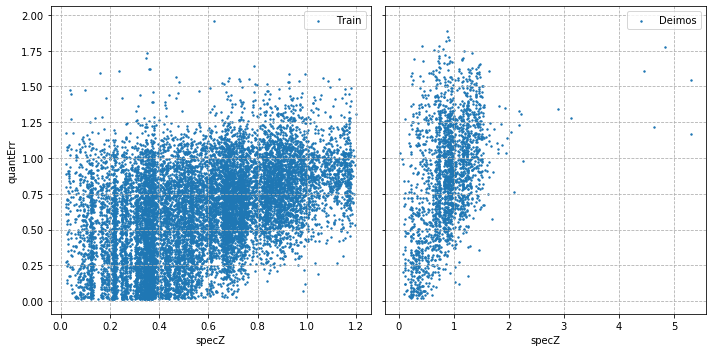

In [55]:
names=['Train','Deimos']
fig,axs=plt.subplots(1,2,figsize=(10,5),sharey='row',sharex='col')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset[specZ],dataset['quantErr'],s=2,label=name,alpha=1)
    axs[i].legend()
    axs[i].set_xlabel(specZ)
axs[0].set_ylabel('quantErr')
plt.tight_layout()

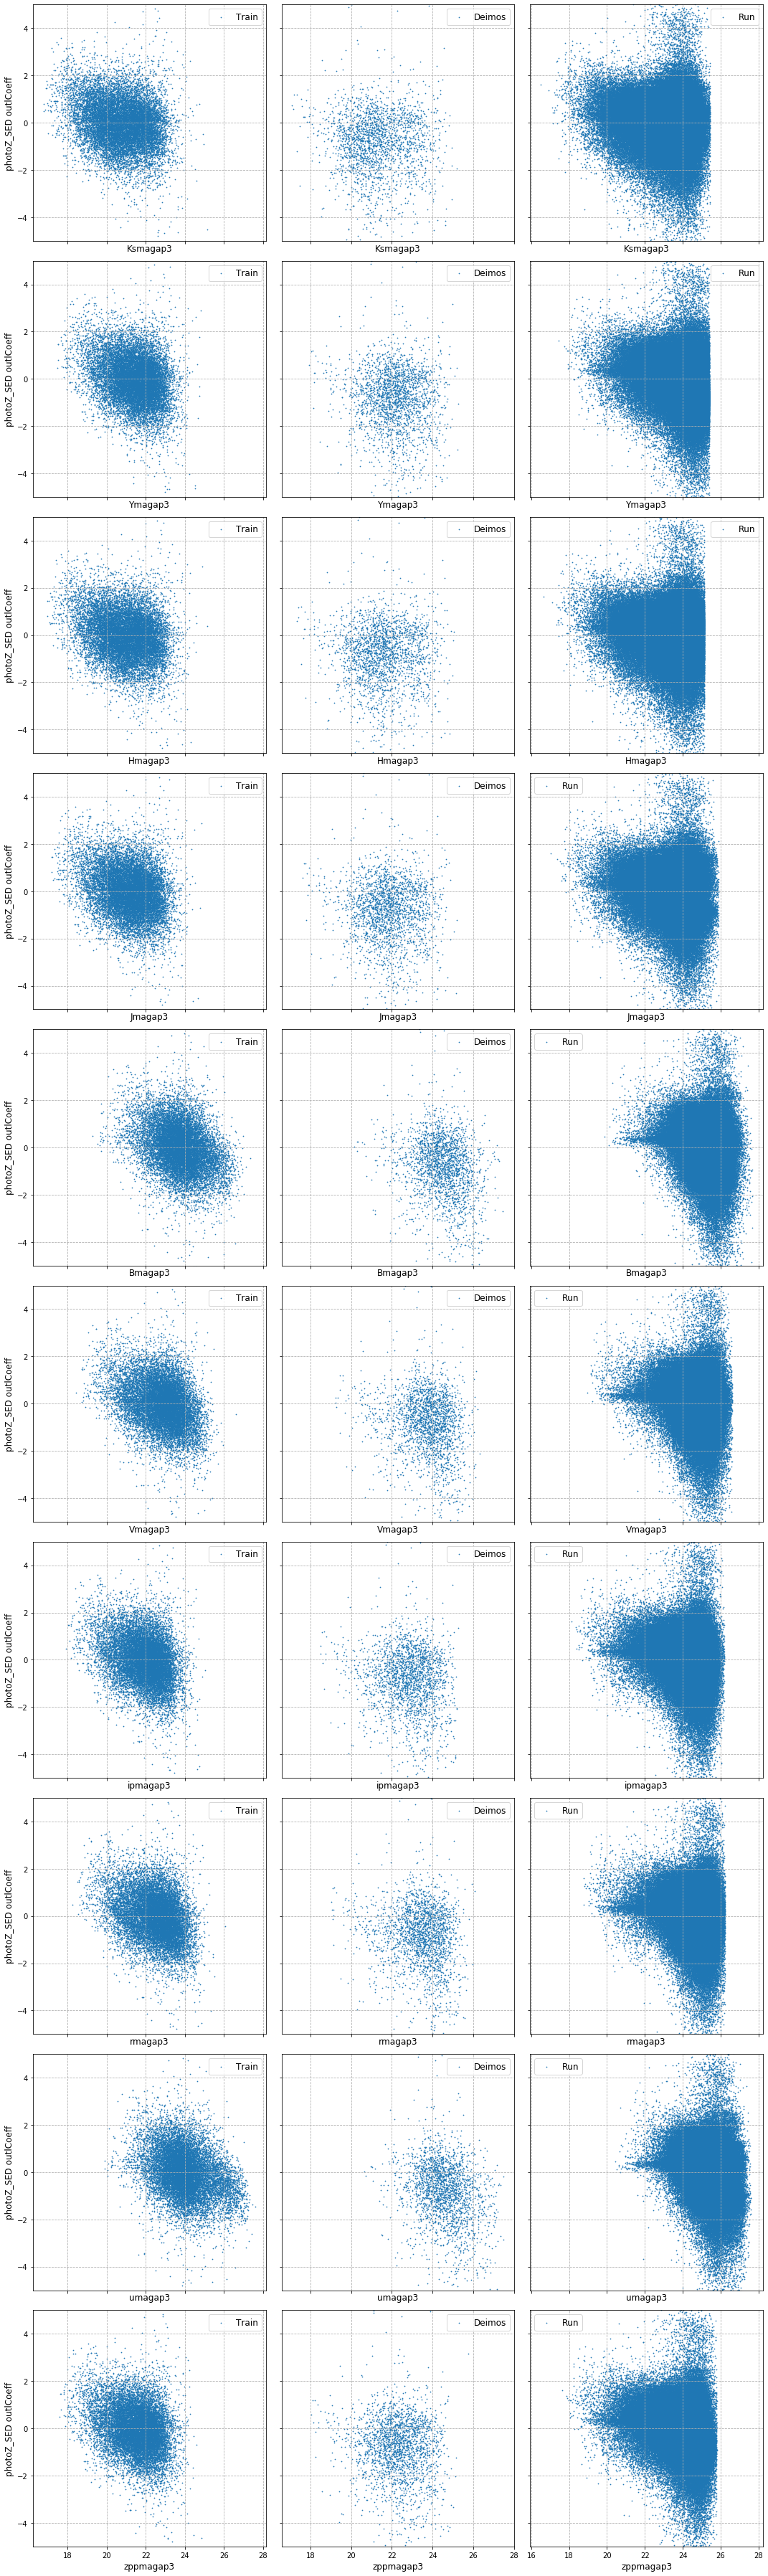

In [56]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharex='col',sharey='row')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset[photoZ_SED+'_outlCoeff'],s=0.5,label=name)
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_ylim(-5,5)
    axs[i][0].set_ylabel('photoZ_SED outlCoeff',size=textSize)
plt.tight_layout()

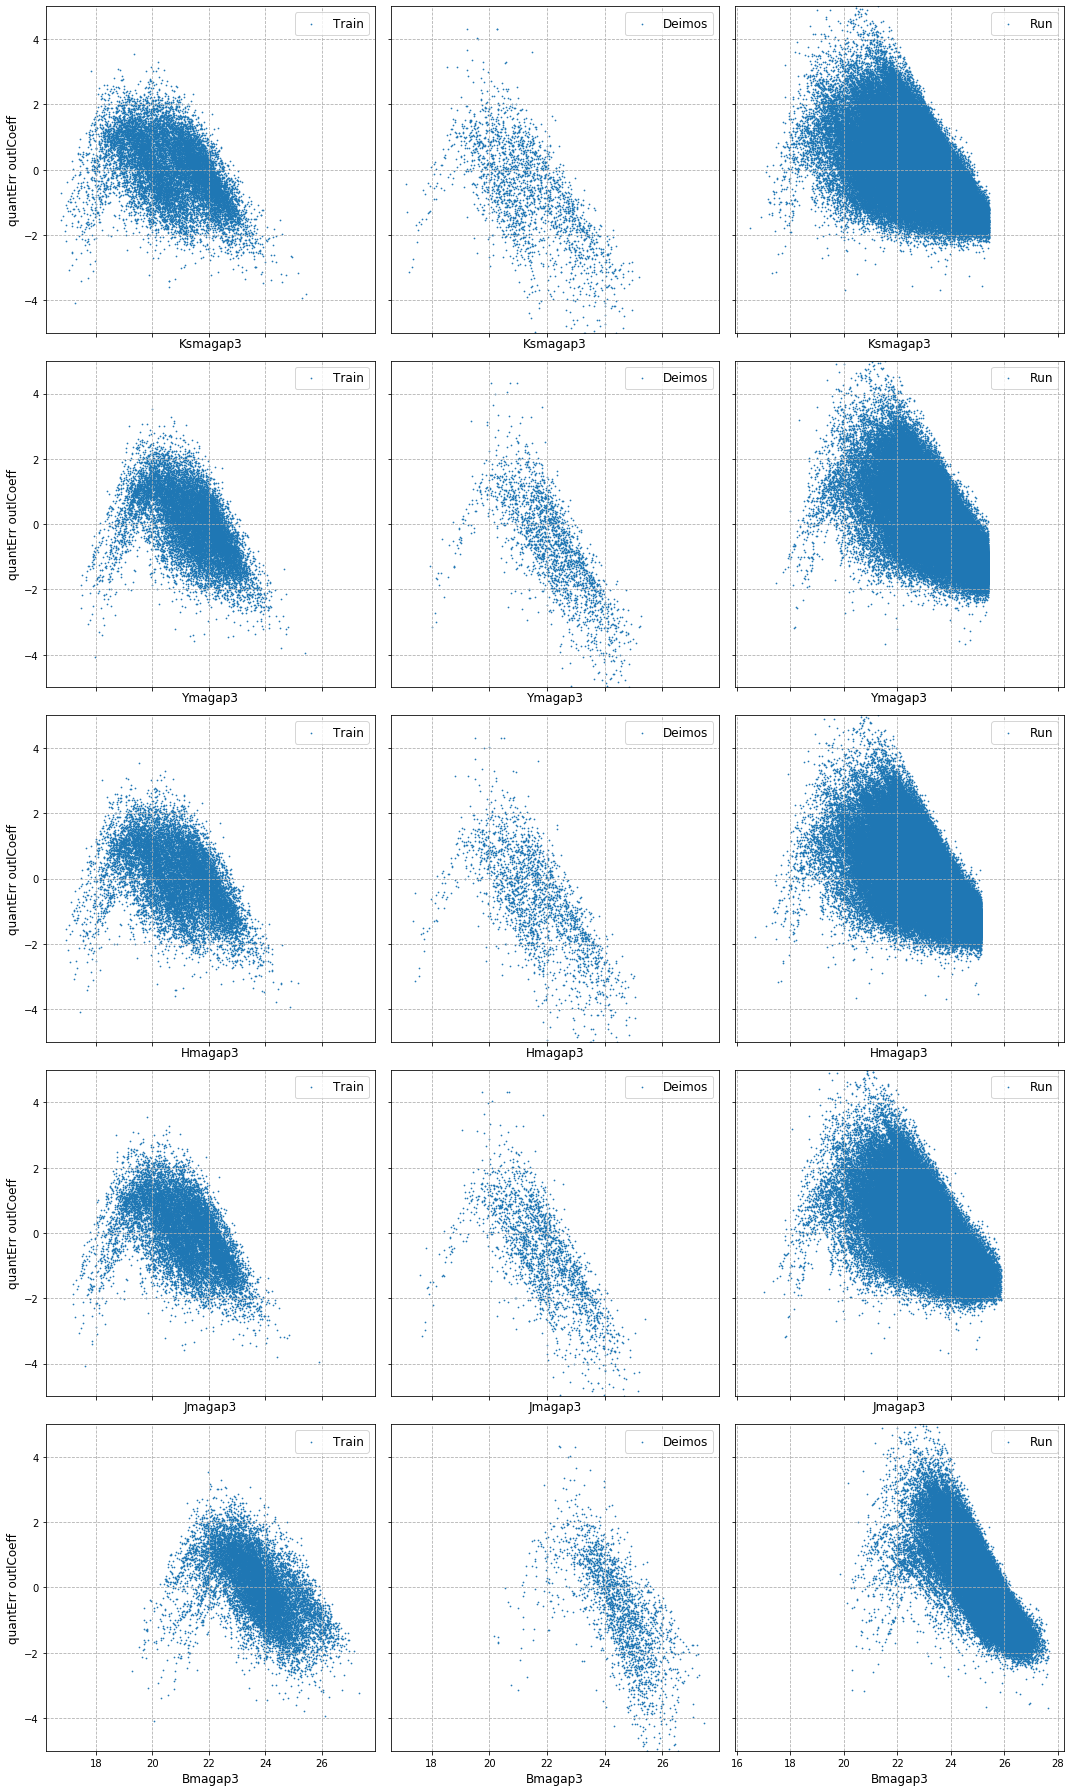

In [64]:
names=['Train','Deimos','Run']
magsWork=mags[:5]
fig,axs=plt.subplots(len(magsWork),3,figsize=(15,5*len(magsWork)),sharex='col',sharey='row')
for i,mag in enumerate(magsWork):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset['quantErr'+'_outlCoeff'],s=0.5,label=name)
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_ylim(-5,5)
    axs[i][0].set_ylabel('quantErr outlCoeff',size=textSize)
plt.tight_layout()

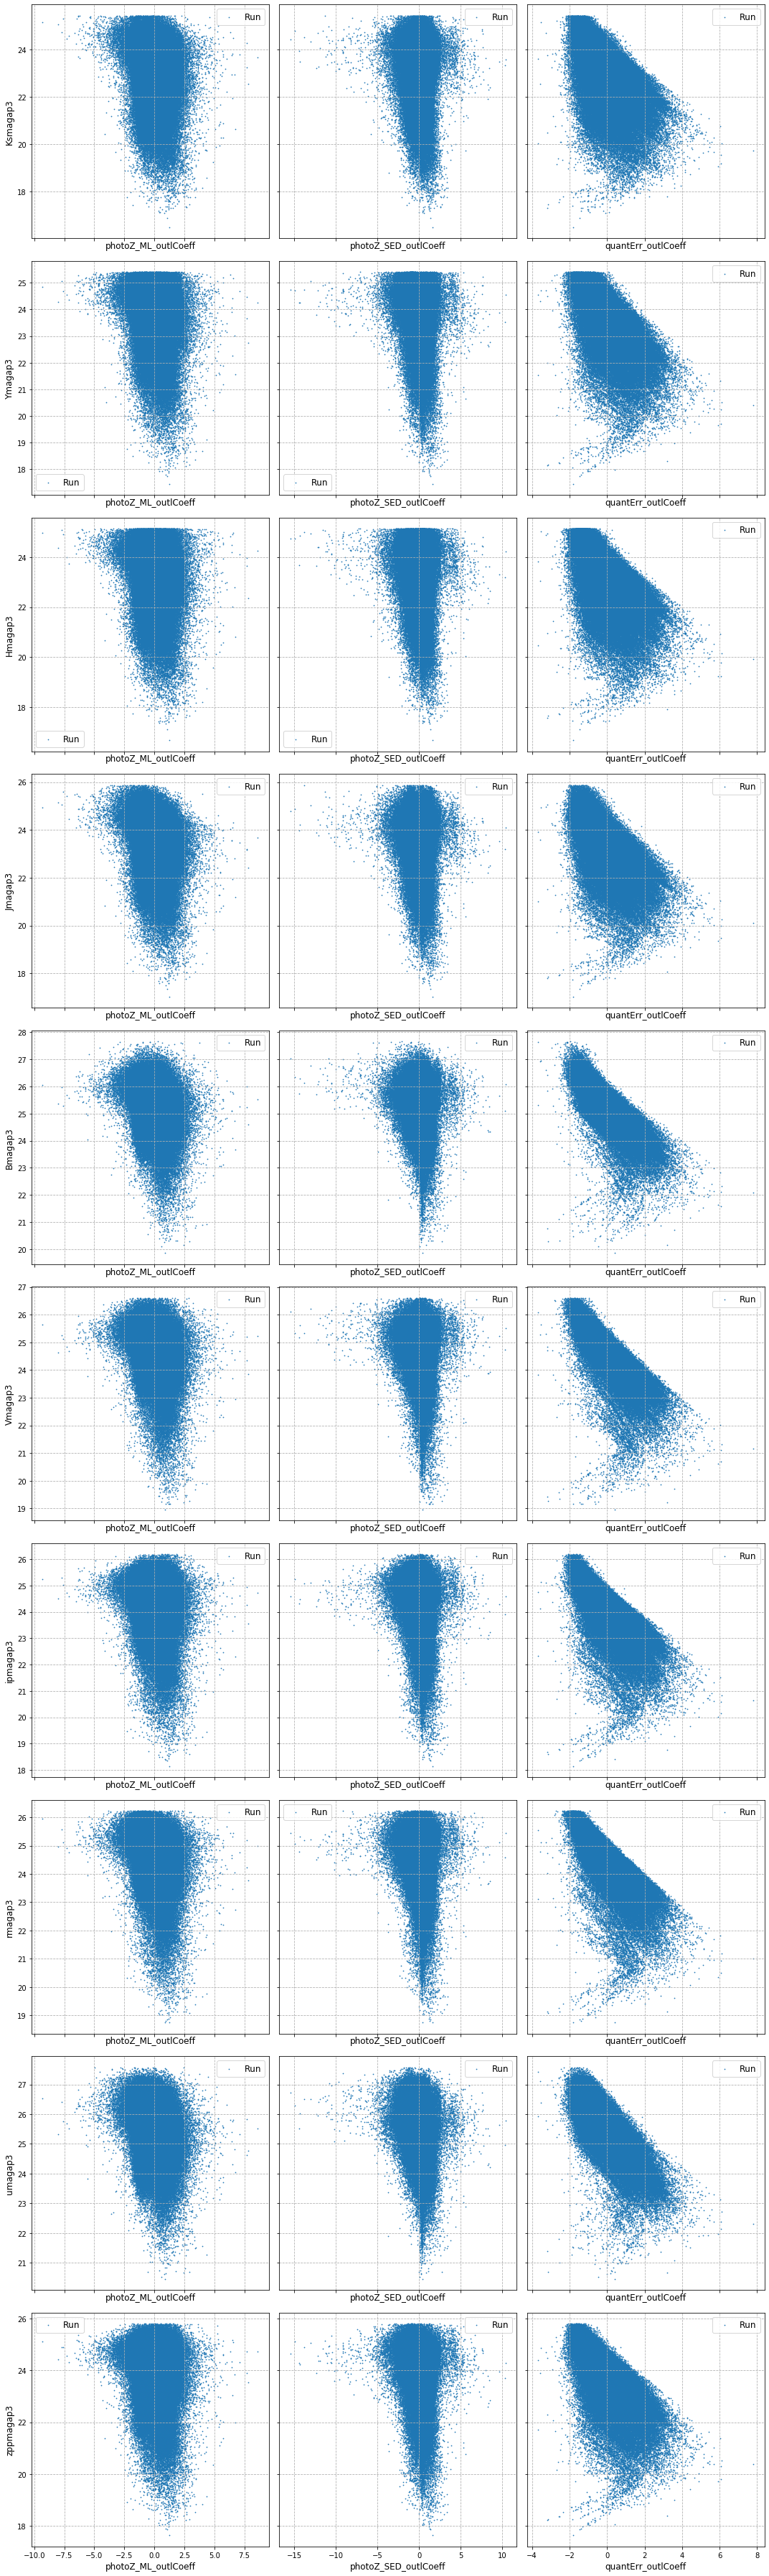

In [58]:
dataset=datasets['Run']
outls=['photoZ_ML_outlCoeff','photoZ_SED_outlCoeff','quantErr_outlCoeff']
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharex='col',sharey='row')
for i,mag in enumerate(mags):
    for j,outl in enumerate(outls):
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[outl],dataset[mag],s=0.5,label='Run')
        
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_xlabel(outl,size=textSize)
    axs[i][0].set_ylabel(mag,size=textSize)
plt.tight_layout()

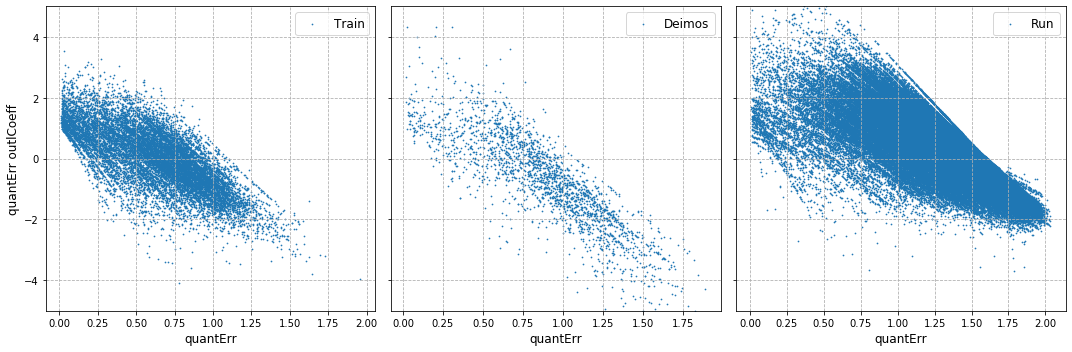

In [65]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['quantErr'],dataset['quantErr'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('quantErr',size=textSize)
axs[0].set_ylabel('quantErr outlCoeff',size=textSize)
plt.tight_layout()

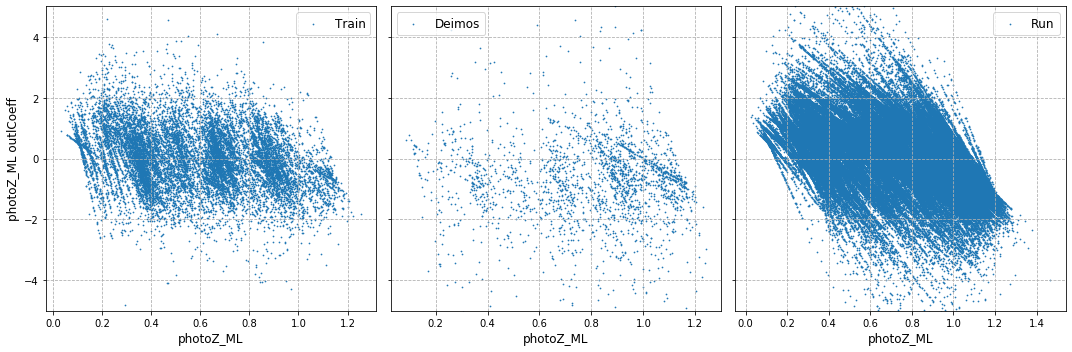

In [60]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['photoZ_ML'],dataset['photoZ_ML'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('photoZ_ML',size=textSize)
axs[0].set_ylabel('photoZ_ML outlCoeff',size=textSize)
plt.tight_layout()

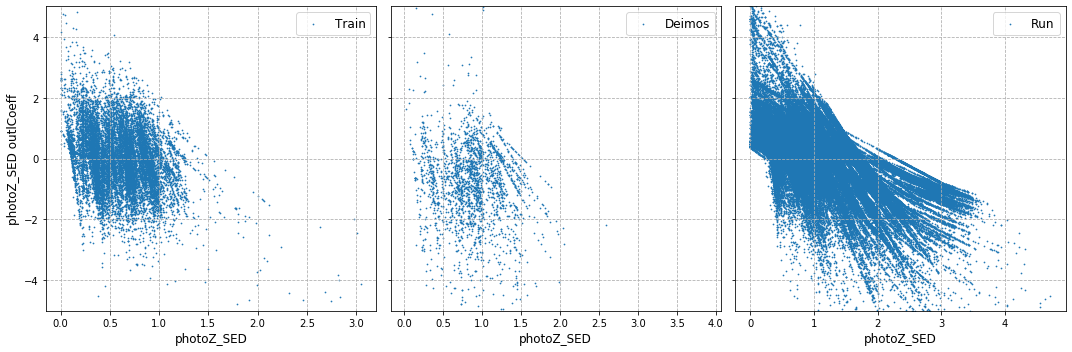

In [61]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['photoZ_SED'],dataset['photoZ_SED'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('photoZ_SED',size=textSize)
axs[0].set_ylabel('photoZ_SED outlCoeff',size=textSize)
plt.tight_layout()